# k-Means Clustering
k-Means merupakan algoritma clustering yang sederhana tapi dapat menghasilkan hasil yang cukup baik. k-Means sendiri sederhana karena memiliki nilai kompleksitas O(tkn) sehingga dapat melakukan clustering dengan cukup cepat. k-Means sendiri merupakan algoritma clustering berbasis partisi, untuk menghitung jarak antar data dapat menggunakan euclidean distance

Import semua library/ dependencies yang diperlukan

In [192]:
import numpy as np
import pandas as pd
import math
import random
from operator import itemgetter
%matplotlib inline

### Import data training yang diperlukan dan kemudian lakukan visualisasi menggunakan matplotlib

In [161]:
datas = pd.read_csv('TrainsetTugas2.txt', sep="\t", header=None)

In [162]:
print(datas[0][5], datas[1][5] )

19.4 23.0


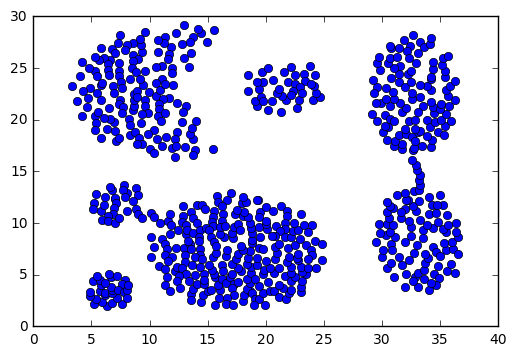

In [193]:
fig = plt.figure()
plt.plot(datas[0], datas[1], 'o')
plt.show()

### Fungsi untuk menghitung eulidean distance

In [194]:
def euclidean_distance(x1, x2, y1, y2):
    return math.sqrt((x1 - y1)**2 + (x2 -y2)**2) 

### Fungsi untuk generate letak centroid pada iterasi pertama dilakukan random pada data latih

In [ ]:
def init_centroid(k, size):
    list_centroid = []
    for i in range(k):
        centroid= random.randint(0, size)
        while (centroid in list_centroid): # pastikan centroid belum pernah dipilih
            centroid = random.randint(1,size)
        list_centroid.append([datas[0][centroid], datas[1][centroid]])
    
    print('list centroid 1: ', list_centroid)
    return list_centroid

### Fungsi untuk mencari letak centroid pada iterasi selanjutnya dengan mencari rata- rata jarak data dengan clusternya

In [196]:
def recalculate_centroid(k, list_cluster):
    list_centroid_loc = []
    for i in range(k):
        sumx1 = 0
        sumx2 = 0
        n = 0
        for j in range(len(datas)):
            if (list_cluster[j] == i):
                sumx1 = sumx1 + datas[0][j]
                sumx2 = sumx2 + datas[1][j]
                n = n + 1
        if (n != 0):
            list_centroid_loc.append([sumx1 / n, sumx2 /n])
         
    return list_centroid_loc
                

### Fungsi untuk mencari suatu data terdapat pada centroid mana dengan menghitung jarak data ke cluster dan mengambil cluster terdekatnya

In [197]:
def which_centroid(x1, x2, list_centroid):
    list_distance = []
    for i in range(len(list_centroid)):
        # list_distance.append(euclidean_distance(x1, x2, datas[0][list_centroid[i]], datas[1][list_centroid[i]])) 
        list_distance.append(euclidean_distance(x1, x2, list_centroid[i][0], list_centroid[i][1]))     
    
    return min(enumerate(list_distance), key=itemgetter(1))[0]

### Fungsi untuk melakukan algortima k-Means clustering dengan memanggil fungsi- fungsi yang telah didefinisikan sebelumnya

In [198]:
def kMeans(k, datas):   
    list_centroid = []
    list_centroid = init_centroid(k, len(datas))       
    list_centroid_lama = []
    print('K-Means: ', k)
    j = 0
    while list_centroid_lama != list_centroid:
        
        list_cluster = []
        for i in range(len(datas)):
            list_cluster.append(which_centroid(datas[0][i], datas[1][i], list_centroid))
        list_centroid_lama = list_centroid
        list_centroid = recalculate_centroid(k, list_cluster)
        j = j + 1
    
    print('Jumlah iterasi: ', j)
    
    list_return = []
    list_return.append(list_centroid)
    list_return.append(list_cluster)
    return list_return

### fungsi untuk menghitung sse, sse digunakan untuk mencari nilai k terbaik dengan menggonakan metode elbow

In [199]:
def sse(k, list_cluster, list_centroid):
    list_sse = []
    print('K: ', k)
    for j in range(k):
        list_sse.append(0)
        
    for j in range(len(list_cluster)):
        
        x1 = datas[0][j]
        x2 = datas[1][j]
        y1 = list_centroid[list_cluster[j]][0]
        y2 = list_centroid[list_cluster[j]][1]
        
        list_sse[list_cluster[j]] = list_sse[list_cluster[j]] + euclidean_distance(x1, x2, y1,y2)
        
    print('list sse', len(list_sse))
    return sum(list_sse)

### Memangil algoritma k-Means dengan k berbeda mulai dari k = 2 hingga k =13 dan kemudian dihitung nilai SSEnya

In [201]:
list_sse= []
for i in range(2,14):
    hit = kMeans(i, datas)

    list_centroid = hit[0]
    list_cluster = hit[1]

    list_sse.append(sse(i, list_cluster, list_centroid))


list centroid 1:  [[31.45, 23.7], [17.9, 5.4]]
K-Means:  2
Jumlah iterasi:  8
K:  2
list sse 2
list centroid 1:  [[22.9, 8.45], [11.55, 6.3], [9.05, 18.2]]
K-Means:  3
Jumlah iterasi:  7
K:  3
list sse 3
list centroid 1:  [[17.05, 3.7], [32.8, 20.0], [35.0, 6.8], [13.05, 6.95]]
K-Means:  4
Jumlah iterasi:  11
K:  4
list sse 4
list centroid 1:  [[33.85, 23.3], [12.15, 18.1], [13.45, 7.95], [4.85, 3.35], [35.35, 8.05]]
K-Means:  5
Jumlah iterasi:  12
K:  5
list sse 5
list centroid 1:  [[9.2, 23.9], [20.1, 9.4], [11.35, 5.55], [36.0, 8.2], [18.1, 11.1], [21.45, 3.75]]
K-Means:  6
Jumlah iterasi:  12
K:  6
list sse 6
list centroid 1:  [[7.85, 26.8], [19.75, 5.05], [7.15, 17.9], [20.05, 10.2], [19.35, 12.2], [20.4, 3.4], [8.05, 12.9]]
K-Means:  7
Jumlah iterasi:  12
K:  7
list sse 7
list centroid 1:  [[8.65, 21.9], [18.4, 6.0], [32.0, 3.8], [8.55, 12.1], [8.95, 22.8], [14.1, 4.1], [5.45, 4.85], [13.2, 9.35]]
K-Means:  8
Jumlah iterasi:  35
K:  8
list sse 8
list centroid 1:  [[10.8, 5.85], [

### Visualisasi SSE untuk menentukan k terbaik dengan metode elbow

[[9.094366197183097, 25.742253521126763], [17.627380952380953, 4.361904761904762], [33.10967741935484, 8.782258064516133], [7.285, 11.82333333333333], [32.65272727272726, 22.114545454545446], [22.390277777777772, 8.537500000000001], [17.925531914893618, 10.159574468085106], [9.39407894736842, 19.92302631578947], [13.401219512195123, 5.108536585365855], [21.623076923076916, 23.02820512820513], [6.53, 3.5116666666666663], [13.210975609756098, 9.312195121951218], [21.640624999999996, 4.5796874999999995]]


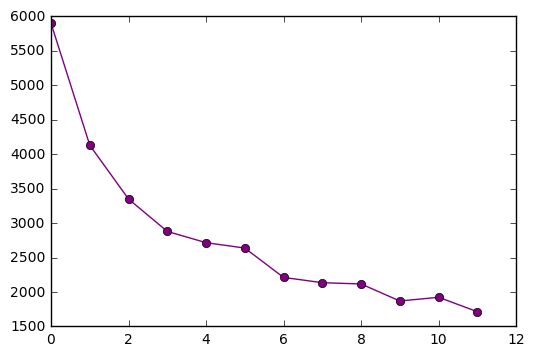

In [203]:
fig = plt.figure()

plt.plot(list_sse, marker = 'o', color='purple')
print(list_centroid)
plt.show()

### Pada grafik diatas dapat ditentukan nilai k yang optimum menurut metode elbow adalah k = 5 karena nilai sse setelah k = 5 sse akan mulai turun dengan tidak terlalu signifikan

In [205]:
k_terpilih = 5
hit = kMeans(k_terpilih, datas)

list_centroid = hit[0]
list_cluster = hit[1]

list_sse.append(sse(k_terpilih, list_cluster, list_centroid))


list centroid 1:  [[14.3, 7.5], [19.25, 5.95], [33.6, 5.45], [8.1, 3.55], [24.1, 21.9]]
K-Means:  5
Jumlah iterasi:  9
K:  5
list sse 5


### Visualisasi hasil clustering

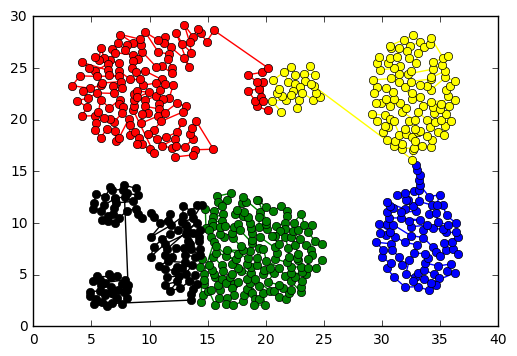

In [207]:
fig = plt.figure()

cluster = pd.Series(list_cluster)

plt.plot(datas[0][cluster==0], datas[1][cluster==0], marker ='o',color='red')
plt.plot(datas[0][cluster==1], datas[1][cluster==1], marker ='o',color='green')
plt.plot(datas[0][cluster==2], datas[1][cluster==2], marker ='o',color='blue')
plt.plot(datas[0][cluster==3], datas[1][cluster==3], marker ='o',color='black')
plt.plot(datas[0][cluster==4], datas[1][cluster==4], marker ='o',color='yellow')
plt.plot(datas[0][cluster==5], datas[1][cluster==5], marker ='o',color='magenta')
plt.plot(datas[0][cluster==6], datas[1][cluster==6], marker ='o',color='orange')

plt.show()

### Import data test dan kemudian visualisasikan untuk melakukan clustering pada data test dengan model yang telah dihasilkan

In [212]:
data_test = pd.read_csv('TestsetTugas2.txt', sep="\t", header=None)
print(data_test.head())

       0      1
0  18.75  22.95
1  21.45  21.45
2  20.50  22.85
3  20.65  24.30
4  21.70  23.80


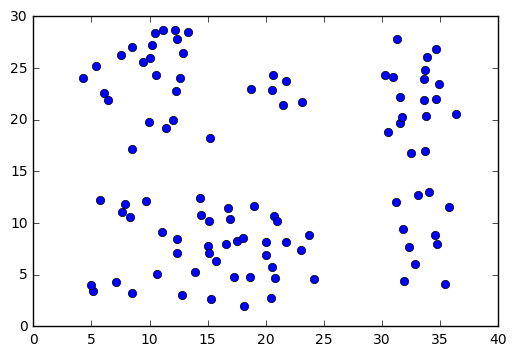

In [213]:
fig = plt.figure()
plt.plot(data_test[0], data_test[1], 'o')
plt.show()

### Hitung dengan mencari data terdekat dengan centroid yang mana

In [214]:
def kMeans_test(datas):   
    list_cluster = []
    for i in range(len(datas)):
        list_cluster.append(which_centroid(datas[0][i], datas[1][i], list_centroid))
        
    return list_cluster


In [215]:
cluster_test = kMeans_test(data_test)
print(cluster_test)

[0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3]


In [216]:
print(sse(k_terpilih, cluster_test, list_centroid))

K:  5
list sse 5
1814.4631642976674


### Visualisasikan hasil testing

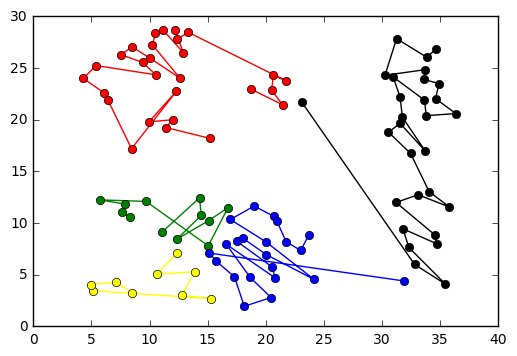

In [189]:
fig = plt.figure()

cluster_test = pd.Series(cluster_test)

plt.plot(data_test[0][cluster_test==0], data_test[1][cluster_test==0], marker ='o',color='red')
plt.plot(data_test[0][cluster_test==1], data_test[1][cluster_test==1], marker ='o',color='green')
plt.plot(data_test[0][cluster_test==2], data_test[1][cluster_test==2], marker ='o',color='blue')
plt.plot(data_test[0][cluster_test==3], data_test[1][cluster_test==3], marker ='o',color='black')
plt.plot(data_test[0][cluster_test==4], data_test[1][cluster_test==4], marker ='o',color='yellow')
plt.plot(data_test[0][cluster_test==5], data_test[1][cluster_test==5], marker ='o',color='magenta')
plt.plot(data_test[0][cluster_test==6], data_test[1][cluster_test==6], marker ='o',color='orange')

plt.show()